### The implementation of mini project for Applied Machine Learning

In [11]:
# Import packages

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset

data_path = os.path.join(os.getcwd(),'data','Spotify_Dataset_V5.csv')
spotifybase = pd.read_csv(data_path,delimiter=';')

In [3]:
# Quick Look of the data
spotifybase.head(10)

,Title,Date,Points (Total),id,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Artist (Ind.),lang,Artist Popularity date-1,Song popularity date-1
0,Ella Baila Sola,2023-05-28,200,3qQbCzHBycnDpGskqOWY0E,0.668,0.758,0.814223,0.033,0.483,0.000,0.834,Eslabon Armado,it,200.0,200.0
1,Ella Baila Sola,2023-05-28,200,3qQbCzHBycnDpGskqOWY0E,0.668,0.758,0.814223,0.033,0.483,0.000,0.834,Peso Pluma,it,200.0,200.0
2,La Bebe - Remix,2023-05-28,199,2UW7JaomAMuX9pZrjVpHAU,0.812,0.479,0.800272,0.333,0.213,0.000,0.559,Yng Lvcas,es,200.0,198.0
3,La Bebe - Remix,2023-05-28,199,2UW7JaomAMuX9pZrjVpHAU,0.812,0.479,0.800272,0.333,0.213,0.000,0.559,Peso Pluma,es,200.0,198.0
4,WHERE SHE GOES,2023-05-28,198,7ro0hRteUMfnOioTFI5TG1,0.652,0.800,0.846376,0.061,0.143,0.629,0.234,Bad Bunny,en,199.0,199.0
5,un x100to,2023-05-28,197,6pD0ufEQq0xdHSsRbg9LBK,0.569,0.724,0.844792,0.047,0.228,0.000,0.562,Grupo Frontera,fr,199.0,196.0
6,un x100to,2023-05-28,197,6pD0ufEQq0xdHSsRbg9LBK,0.569,0.724,0.844792,0.047,0.228,0.000,0.562,Bad Bunny,fr,199.0,196.0
7,Cupid - Twin Ver.,2023-05-28,196,7FbrGaHYVDmfr7KoLIZnQ7,0.783,0.592,0.726517,0.033,0.435,0.000,0.726,FIFTY FIFTY,de,197.0,197.0
8,Flowers,2023-05-28,195,4DHcnVTT87F0zZhRPYmZ3B,0.707,0.681,0.837872,0.067,0.063,0.000,0.646,Miley Cyrus,en,195.0,195.0
9,Kill Bill,2023-05-28,194,1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,0.798355,0.039,0.052,0.144,0.418,SZA,mt,193.0,193.0


In [4]:
top20_lang = spotifybase["lang"].value_counts().iloc[:10].index.to_list()
dummies = pd.get_dummies(spotifybase["lang"])
dummies = dummies[top20_lang]
print(dummies)
spotifybase = pd.concat([spotifybase, dummies], axis=1)

        en  es  de  it  fr  pt  hu  pl  fi  cs
0        0   0   0   1   0   0   0   0   0   0
1        0   0   0   1   0   0   0   0   0   0
2        0   1   0   0   0   0   0   0   0   0
3        0   1   0   0   0   0   0   0   0   0
4        1   0   0   0   0   0   0   0   0   0
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
648477   1   0   0   0   0   0   0   0   0   0
648478   0   0   1   0   0   0   0   0   0   0
648479   1   0   0   0   0   0   0   0   0   0
648480   1   0   0   0   0   0   0   0   0   0
648481   1   0   0   0   0   0   0   0   0   0

[648482 rows x 10 columns]


### Question: Which feature is more relevant or important to the popularity of the song?

#### Read the data

In [5]:
data = spotifybase

### Feature Selection
To identify which attribute is more relevant to the rank of the song, in this task we chose`Danceability`,`Energy`,`Loudness`,`Speechness`,`Acousticness`,`Instrumentalness`,`Valence`,`Artist Poularity data-1`as features, We chose `Points(Total)` as label.

However, We have found that FEATURE `Loudness` is from -2000 to -12000, and LABEL `Points(Total)` is from 0-200, so we should apply a scaling method to ensure that all features are on a  similar scale. This helps the model converge faster and make it more robust. METHOD `Min-Max scaling` can be used for features.

### Data Preprocessing

In [6]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Define the features and labels
features = ['Danceability', 'Energy','Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence','Artist Popularity date-1','en','es','de','it','fr','pt','hu','pl','fi','cs']
label = 'Points (Total)'

In [7]:
# Scale the features
data[features] = scaler.fit_transform(data[features])

# Scale the label
data[label] = scaler.fit_transform(data[[label]])

### Split the data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = data[features]
y = data[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### PCA analysis

12


Text(0.5, 1.0, 'PCA explained variance with different number of components')

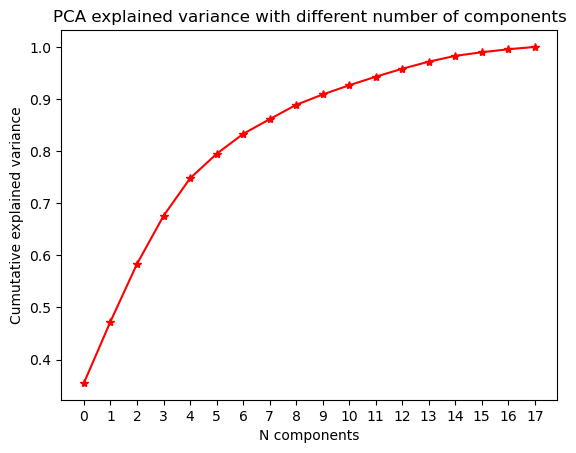

In [13]:
from sklearn.decomposition import PCA
threshold = 0.95
pca = PCA(n_components=18)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)
pca_ratio = pca.explained_variance_ratio_
x = np.arange(len(pca_ratio))
sums = 0
for i in x:
    sums += pca_ratio[i]
    if sums > threshold:
        print(i)
        break

# Plot the figure of explained variance for PCA
pca_hist = np.cumsum(pca_ratio)
plt.plot(x, pca_hist, color='r', marker='*')
plt.xticks(x)
plt.xlabel('N components')
plt.ylabel('Cumutative explained variance')
plt.title('PCA explained variance with different number of components')

### Create the model
In this case, we used different machine learning algorithms to figure out the question.

In [14]:
if_pca = False
n_components = 3
if if_pca:
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
else:
    X_train = X_train
    X_test = X_test

#### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [16]:
import time
# Create and train a linear regression model
start_time = time.time()
model = LinearRegression()
model.fit(X_train, y_train)
end_time = time.time()

execution_time = end_time - start_time
print("Execution time:", execution_time)

Execution time: 2.173840045928955


In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [18]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2) Score: {r2}")

Mean Squared Error: 0.05705950471934955
R-squared (R^2) Score: 0.3157646619929648


In [19]:
# Feature Importance
feature_importance = model.coef_
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance:
Danceability: -0.012406744377575489
Energy: -0.024576322632950454
Loudness: -0.02721106574791739
Speechiness: -0.10192718804168956
Acousticness: -0.01797938070448928
Instrumentalness: 0.008462846498324374
Valence: 0.05688924849095247
Artist Popularity date-1: 0.5712388877325968
en: 0.026777648838105492
es: -0.01623072870958483
de: 0.0354608042608766
it: 0.048264240765577594
fr: 0.01802070565480326
pt: 0.03565483450700646
hu: 0.003053953694369881
pl: -0.023865883473308543
fi: 0.03633392253537751
cs: 0.015152142534587866


#### Hyper-parameter tuning for Random Forest

In [20]:
# form training set randomly choose 10000 samples for hyper-parameter tuning
X_train_sample = X_train.sample(n=10000,random_state=0)
y_train_sample = y_train[X_train_sample.index]

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [22]:
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train_sample, y_train_sample)

# output the best parameter
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Score: 0.5140263755962815


In [25]:
import time

start_time = time.time()
model = RandomForestRegressor(n_estimators=500,max_depth=20, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, y_train)
end_time = time.time()

execution_time = end_time - start_time

print("Execution time:", execution_time)

Execution time: 912.7119822502136


In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model using mean squared error on the original scale
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Original Scale: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2) Score: {r2}")

Mean Squared Error on Original Scale: 0.021450583114382013
R-squared (R^2) Score: 0.7427729690275431


In [28]:
# Feature Importance
feature_importance = model.feature_importances_
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance:
Danceability: 0.07229528151229501
Energy: 0.07814784319657266
Loudness: 0.08100349403025194
Speechiness: 0.07526878912668973
Acousticness: 0.07672097605126
Instrumentalness: 0.012183398595358412
Valence: 0.07775531678063283
Artist Popularity date-1: 0.5004454318804596
en: 0.006804936663584053
es: 0.005369545254128054
de: 0.0028804994171483024
it: 0.003953690752549444
fr: 0.0017740108104527645
pt: 0.0014776618189384924
hu: 0.0011089388794356004
pl: 0.0012443393969986973
fi: 0.0005711104259672441
cs: 0.000994735407277224


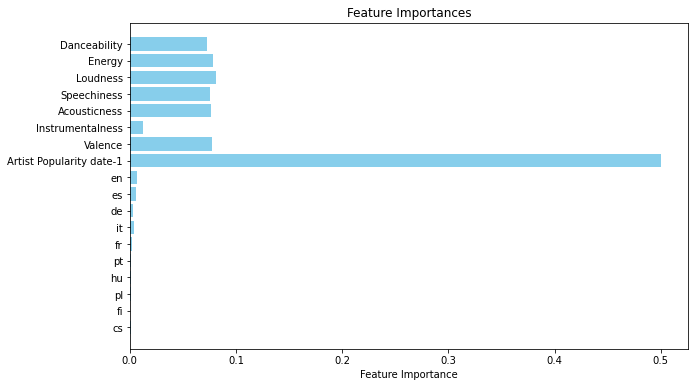

In [29]:
import matplotlib.pyplot as plt

# Feature names (assuming they are in the same order as your importances)
feature_names = ['Danceability','Energy','Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence','Artist Popularity date-1','en','es','de','it','fr','pt','hu','pl','fi','cs']

# Importances
for i in range(len(feature_importance)):
    importances = feature_importance
    i += 1
    
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
plt.show()

#### Hyper-parameter tuning for XGBoost

In [33]:
from xgboost import XGBRegressor

In [34]:
param_grid = {
    'eta': [0.001, 0.01, 0.1],
    'gamma': [0.001, 0.01, 0.1],
    'max_depth': [2, 5, 8],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [100, 200, 300]
}

In [35]:
xgb = XGBRegressor()
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_sample, y_train_sample)

# output the best parameter
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'eta': 0.1, 'gamma': 0.001, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 300}
Best Score: 0.5133578864888395


In [36]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [37]:
# Set Parameters
params = {
    'objective': 'reg:squarederror',  # for regression problems
    'eta': 0.1,
    'gamma': 0.001,
    'max_depth': 8,
    'min_child_weight': 1,
    'n_estimators': 300,
    'eval_metric': ['rmse', 'mae']
}

In [38]:
# Train the Model
num_rounds = 100  # number of boosting rounds
start_time = time.time()
model = xgb.train(params, dtrain, num_rounds, evals=[(dtest, "eval")], early_stopping_rounds=10)
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time)

C:\Users\13540\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [22:57:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	eval-rmse:0.27860	eval-mae:0.24088
[1]	eval-rmse:0.27004	eval-mae:0.23303
[2]	eval-rmse:0.26278	eval-mae:0.22605
[3]	eval-rmse:0.25653	eval-mae:0.21985
[4]	eval-rmse:0.25107	eval-mae:0.21427
[5]	eval-rmse:0.24646	eval-mae:0.20935
[6]	eval-rmse:0.24253	eval-mae:0.20501
[7]	eval-rmse:0.23913	eval-mae:0.20114
[8]	eval-rmse:0.23604	eval-mae:0.19764
[9]	eval-rmse:0.23350	eval-mae:0.19458
[10]	eval-rmse:0.23133	eval-mae:0.19189
[11]	eval-rmse:0.22939	eval-mae:0.18944
[12]	eval-rmse:0.22750	eval-mae:0.18710
[13]	eval-rmse:0.22597	eval-mae:0.18517
[14]	eval-rmse:0.22421	eval-mae:0.18306
[15]	eval-rmse:0.22281	eval-mae:0.18133
[16]	eval-rmse:0.22167	eval-mae:0.17983
[17]	eval-rmse:0.22054	eval-mae:0.17842
[18]	eval-rmse:0.21955	eval-mae:0.17715
[19]	eval-rmse:0.21847	eval-mae:0.17593
[20]	eval-rmse:0.21752	eval-mae:0.17476
[21]	eval-rmse:0.21664	eval-mae:0.17378
[22]	eval-rmse:0.21584	eval-mae:0.17283
[23]	eval-rmse:0.21501	eval-mae:0.17191
[24]	eval-rmse:0.21372	eval-mae:0.17058
[25]	eval-

In [39]:
# Make Predictions
y_pred = model.predict(dtest)

In [40]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [41]:
print(f"Mean Squared Error: {mse:.12f}")
print(f"r2: {r2:.12f}")

Mean Squared Error: 0.031557103440
r2: 0.621579516947


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

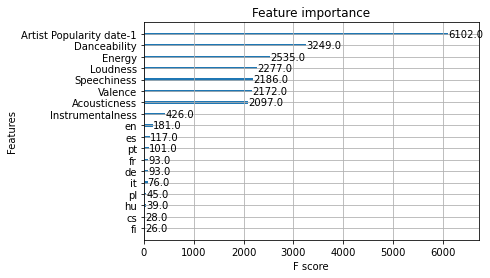

In [42]:
xgb.plot_importance(model)

#### Hyper-parameter for Multi-Layer Perception

In [22]:
from sklearn.neural_network import MLPRegressor

In [23]:
mlp = MLPRegressor()
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

In [25]:
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_sample, y_train_sample)

# output the best parameter
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'max_iter': 300}
Best Score: 0.3365064427964829


In [29]:
# Create and train the MLPRegressor model
start_time = time.time()
mlp = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', max_iter=300,learning_rate_init=0.001)
mlp.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time)

Execution time: 94.92619824409485


In [30]:
# Make predictions on the test set
y_pred = mlp.predict(X_test)

In [31]:
# Evaluate the model using mean squared error on the original scale
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Squared Error on Original Scale: {mse}")
print(f"r2: {r2}")

Mean Squared Error on Original Scale: 0.039761338335502855
r2: 0.5231975302025542


In [32]:
from sklearn.inspection import permutation_importance

result = permutation_importance(mlp, X_test, y_test, n_repeats=30, random_state=0)

print(result.importances_mean)

[0.24691598 0.30146438 0.1175737  0.19325145 0.3350149  0.03309828
 0.33250167 0.93097117 0.37247284 0.24662284 0.06746247 0.06479753
 0.06973678 0.06187416 0.02176917 0.02350466 0.02550577 0.0159296 ]
